In [40]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [41]:
x=pd.read_csv("C:\\Users\\sumeera\\Desktop\\data science\\dataset\\Computer.csv")
x.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [42]:
import matplotlib.pyplot as plt
# x['premium'].value_counts(sorted).plot.bar()

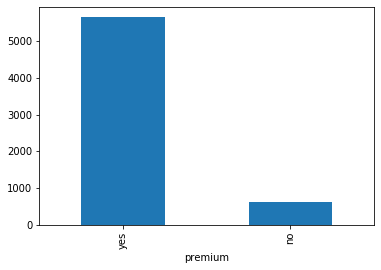

In [43]:
x.groupby(['premium'])['premium'].count().sort_values(ascending=False).plot.bar()

In [44]:
x['premium'].value_counts()

yes    5647
no      612
Name: premium, dtype: int64

In [45]:
x=pd.get_dummies(x,drop_first=True)

In [46]:
x.head()

,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,1499,25,80,4,14,94,1,0,0,1
1,1795,33,85,2,14,94,1,0,0,1
2,1595,25,170,4,15,94,1,0,0,1
3,1849,25,170,8,14,94,1,0,0,0
4,3295,33,340,16,14,94,1,0,0,1


In [47]:
x['premium_yes'].value_counts()

1    5647
0     612
Name: premium_yes, dtype: int64

In [48]:
from sklearn.utils import resample

In [49]:
x_minor =x[x['premium_yes']==0]
x_major = x[x['premium_yes']==1]
z=resample(x_major)
d=pd.concat([x_minor,z])

In [50]:
a = d.drop(['premium_yes'],axis=1)
b = d['premium_yes']

In [51]:
x_test,x_train,y_test,y_train = train_test_split(a,b,test_size=0.2,random_state=123)

In [52]:
clf = RandomForestClassifier()
clf.fit(x_train , y_train)

RandomForestClassifier()

In [53]:
pred = clf.predict(x_test)

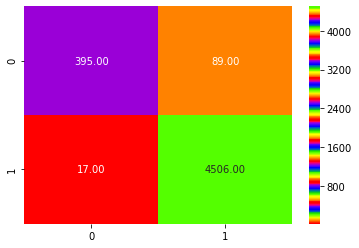

In [54]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt=".2f",cmap='prism')

In [55]:
print(confusion_matrix(y_test,pred))

[[ 395   89]
 [  17 4506]]


In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       484
           1       0.98      1.00      0.99      4523

    accuracy                           0.98      5007
   macro avg       0.97      0.91      0.94      5007
weighted avg       0.98      0.98      0.98      5007



In [57]:
import pandas as pd 
# features = pd.DataFrame(p,index=x_train.columns,columns=['importance']).sort_values(ascending=False)
features= pd.DataFrame(clf.feature_importances_, index = x_train.columns,columns=['importance']).sort_values('importance',  ascending=False)       

In [58]:
features

,importance
price,0.278782
hd,0.243332
trend,0.137934
ads,0.096171
ram,0.091604
speed,0.077596
cd_yes,0.035156
screen,0.027178
multi_yes,0.012248


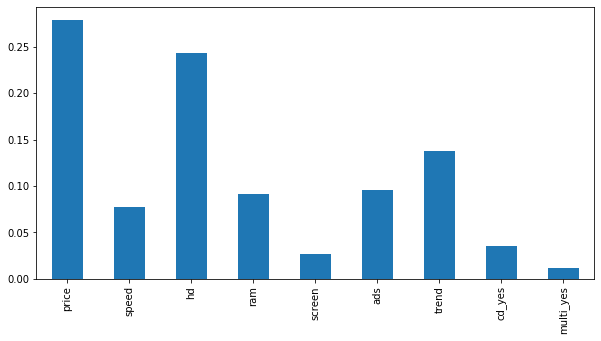

In [62]:
plt.figure(figsize=(10,5))
rf = pd.Series(clf.feature_importances_,index=x_train.columns)
rf.plot(kind="bar")